# Semana 7 Features

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [61]:
#Lendo os dados do Titanic
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_full = pd.merge(df_train,df_test,how='outer')
df_full.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [62]:
df_train_features = df_full.drop(['PassengerId','Survived'],axis=1)
df_train_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df_train_features_columns = df_train_features.columns
df_train_features_columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [64]:
coltitle = df_train_features['Name'].apply(
    lambda s: pd.Series(
        {
            'Title': s.split(',')[1].split('.')[0].strip(),
          # 'LastName': s.split(',')[0].strip(),
           # 'FirstName': s.split(',')[1].split('.')[1].strip()
        }
    ))
df_train_features = pd.concat([df_train_features, coltitle], axis=1) 
df_train_features.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [65]:
numerical_features = df_train_features.select_dtypes(['float64','int64']).columns
numerical_features 

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [66]:
df_train_features[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 5 columns):
Pclass    1309 non-null int64
Age       1046 non-null float64
SibSp     1309 non-null int64
Parch     1309 non-null int64
Fare      1308 non-null float64
dtypes: float64(2), int64(3)
memory usage: 61.4 KB


In [67]:
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
pipe1 = make_pipeline(SimpleImputer(strategy="median"),
                              StandardScaler(),
                          )
col_trans1 = make_column_transformer((pipe1,numeric_cols))
make_pipe1= col_trans1.fit(df_train_features)
pipe1_df = pd.DataFrame(data=make_pipe1.transform(df_train_features),columns=[s + '_' for s in numeric_cols])
df_train_features = pd.concat([df_train_features,pipe1_df],axis=1)
df_train_features.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_,SibSp_,Parch_,Fare_
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,-0.581628,0.481288,-0.445,-0.503291
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0.658652,0.481288,-0.445,0.734744


In [68]:
one_hot_cols = ['Sex', 'Cabin','Embarked']
pipe2 = make_pipeline(SimpleImputer(strategy="most_frequent"),
                          )
col_trans2 = make_column_transformer((pipe2,one_hot_cols))
make_pipe2 = col_trans2.fit(df_train_features)
pipe2_df = pd.DataFrame(data=make_pipe2.transform(df_train_features),columns=[s + '_' for s in one_hot_cols])
df_train_features = pd.concat([df_train_features,pipe2_df],axis=1)
df_train_features.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_,SibSp_,Parch_,Fare_,Sex_,Cabin_,Embarked_
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,-0.581628,0.481288,-0.445,-0.503291,male,C23 C25 C27,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0.658652,0.481288,-0.445,0.734744,female,C85,C


In [69]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Pclass       1309 non-null int64
Name         1309 non-null object
Sex          1309 non-null object
Age          1046 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Ticket       1309 non-null object
Fare         1308 non-null float64
Cabin        295 non-null object
Embarked     1307 non-null object
Title        1309 non-null object
Age_         1309 non-null float64
SibSp_       1309 non-null float64
Parch_       1309 non-null float64
Fare_        1309 non-null float64
Sex_         1309 non-null object
Cabin_       1309 non-null object
Embarked_    1309 non-null object
dtypes: float64(6), int64(3), object(9)
memory usage: 194.3+ KB


In [70]:
keep_cols    = ['Pclass','Title']
one_hot_cols = ['Sex', 'Cabin','Embarked']
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

full_cols = np.append(np.append(keep_cols,[s + '_' for s in one_hot_cols]),[s + '_' for s in numeric_cols])

In [71]:
df_train_features = pd.get_dummies(df_train_features[full_cols]) 
df_train_features.head(3)

,Pclass,Age_,SibSp_,Parch_,Fare_,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,...,Cabin__F G73,Cabin__F2,Cabin__F33,Cabin__F38,Cabin__F4,Cabin__G6,Cabin__T,Embarked__C,Embarked__Q,Embarked__S
0,3,-0.581628,0.481288,-0.445,-0.503291,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.658652,0.481288,-0.445,0.734744,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,-0.271558,-0.479087,-0.445,-0.490240,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
df_train_features.isnull().values.any()

False

In [73]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_full = pd.merge(df_train,df_test,how='outer')

df_train_features = df_full.drop(['PassengerId'],axis=1)

keep_cols    = ['Pclass','Title']
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare'] 
one_hot_cols = ['Sex', 'Cabin','Embarked']
target       = ['Survived']

target_df = df_train_features.Survived
pclass = df_train_features.Pclass
coltitle = df_train_features['Name'].apply(lambda s: pd.Series(
                                                                {'Title': s.split(',')[1].split('.')[0].strip()}
                                                              )
                                        )
median_std_pipe = make_pipeline(
                      SimpleImputer(strategy="median"),
                      StandardScaler()
                      )

freq_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"))

col_transf = make_column_transformer(
                                        (median_std_pipe,numeric_cols),
                                        (freq_pipe,one_hot_cols)
                                    )

pipeline = col_transf.fit(df_train_features)

pipe_df = pd.DataFrame(pipeline.transform(df_train_features),columns=numeric_cols + one_hot_cols)


df_to_train = pd.get_dummies(pd.concat([target_df,pclass,coltitle,pipe_df],axis=1))
df_to_train[~df_to_train.Survived.isna()]

,Survived,Pclass,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0.0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
linear_model = LinearRegression()

In [76]:
X = df_to_train[~df_to_train.Survived.isna()].drop(['Survived'],axis=1)
Y = df_to_train[~df_to_train.Survived.isna()].Survived
linear_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_full = pd.merge(df_train,df_test,how='outer')


df_test_features = df_full.drop(['PassengerId'],axis=1)

target_df = df_test_features.Survived
keep_cols    = ['Pclass','Title']
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare'] 
one_hot_cols = ['Sex', 'Cabin','Embarked']

pclass = df_test_features.Pclass
coltitle = df_test_features['Name'].apply(lambda s: pd.Series(
                                                                {'Title': s.split(',')[1].split('.')[0].strip()}
                                                              )
                                        )

pipeline = col_transf.fit(df_test_features)
pipe_df = pd.DataFrame(pipeline.transform(df_test_features),columns=numeric_cols + one_hot_cols)
df_to_test = pd.get_dummies(pd.concat([target_df,pclass,coltitle,pipe_df],axis=1))
df_to_test[df_to_test.Survived.isna()]

,Survived,Pclass,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
891,NaN,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
892,NaN,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
893,NaN,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
894,NaN,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
895,NaN,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1305,NaN,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1306,NaN,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,NaN,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
X_ = df_to_test[df_to_test.Survived.isna()].drop(['Survived'],axis=1)
pred = pd.DataFrame(linear_model.predict(X_),columns=['Pred'])
pred

,Pred
0,2.860012e+09
1,9.403306e+09
2,1.279838e+10
3,1.550407e-01
4,1.073772e+00
...,...
413,3.599930e-02
414,-1.418177e+11
415,-2.298002e+10
416,3.599930e-02


In [89]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pred_full = pd.concat([df_test,pred],axis=1)

In [90]:
pred_full.Pred = np.round(pred_full.Pred,3)
pred_full

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pred
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q,2860011665.899
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S,9403305639.022
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q,12798383423.231
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S,0.155
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S,1.074
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.050,NaN,S,0.036
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000,0,0,PC 17758,108.900,C105,C,-141817673740.080
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500,0,0,SOTON/O.Q. 3101262,7.250,NaN,S,-22980019506.268
416,1308,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.050,NaN,S,0.036


In [80]:
df_test.shape

(418, 11)

In [81]:
pred.shape

(418, 1)

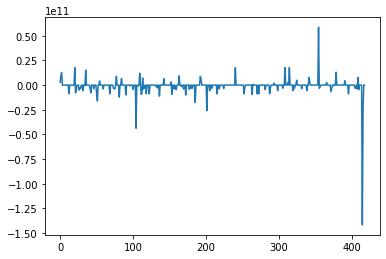

In [93]:
plt.plot(pred_full.Pred)